variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962562639)
var

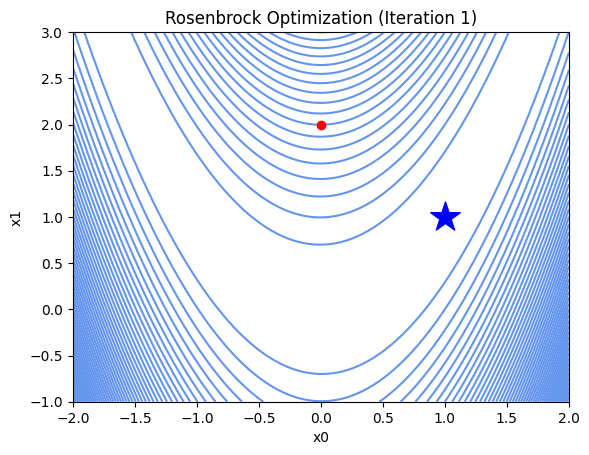

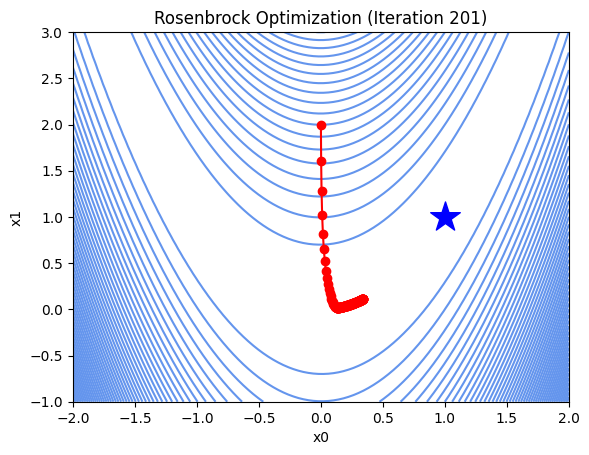

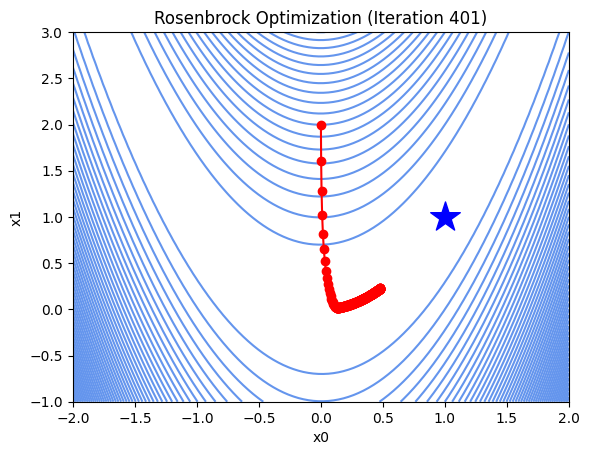

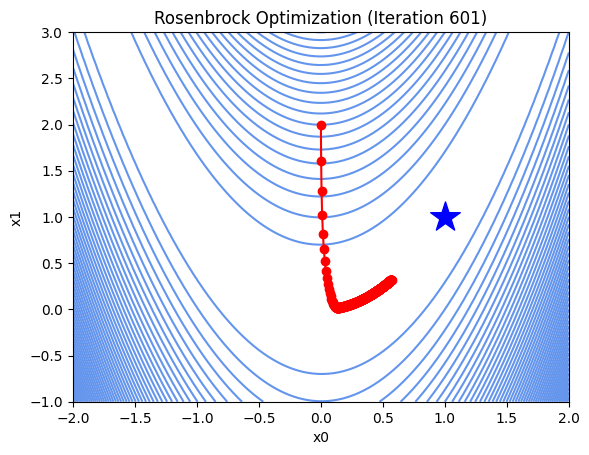

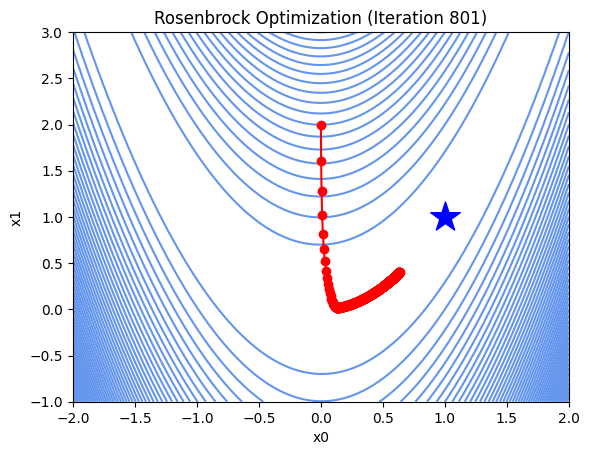

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dezero import Variable

# 초기 포인트 설정
# TODO:  초깃값을 바꿔서 확인해보자
from steps.step28 import rosenbrock

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

# TODO: 임의로 학습률을 바꿔서 확인해 보자.
lr = 1e-3  # 학습률

# TODO: 임의로 반복횟수를 바꿔 확인해 보자.
iters = 1000  # 반복 횟수

log_interval = 200 # 그래프 인터벌

# 포인트 이동 정보
x0_history = []
x1_history = []

for i in range(iters):
    # 현재 포인트를 이력에 추가
    x0_history.append(x0.data.item())
    x1_history.append(x1.data.item())

    y = rosenbrock(x0, x1)

    # Init grad
    x0.cleargrad()
    x1.cleargrad()

    # backpropagation
    y.backward()

    # gradient descent
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

    if i % log_interval ==0:
        # 그래프 업데이트
        plt.clf()
        # Rosenbrock 함수의 등고선 플롯만 그리기
        x0_range = np.linspace(-2, 2, 100)
        x1_range = np.linspace(-1, 3, 100)
        X0,X1= np.meshgrid(x0_range, x1_range)
        Y = rosenbrock(Variable(X0), Variable(X1))
        plt.contour(X0, X1, Y.data, levels=50, colors='cornflowerblue')

        # 현재 포인트 표시 및 선으로 연결
        plt.scatter([1.0], [1.0],marker="*", color="blue",s=500) # plotting single point
        plt.plot(x0_history, x1_history, "ro-",)
        plt.xlabel('x0')
        plt.ylabel('x1')
        plt.title(f'Rosenbrock Optimization (Iteration {i+1})')

        plt.pause(0.01)  # 잠시 멈춤

plt.show()